In [2]:
#import wg1template
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import wg1template.histogram_plots as wg1
import wg1template.point_plots as points
from wg1template.plot_style import TangoColors
from wg1template.plot_utilities import export

import pandas as pd
from root_pandas import read_root
import math

Welcome to JupyROOT 6.24/00


In [4]:
sig = read_root('merged_1000_final_sig.root')
#uu = read_root('merged_1000_final_uu.root')
#dd = read_root('merged_1000_final_dd.root')
#ss = read_root('merged_1000_final_ss.root')
#cc = read_root('merged_1000_final_cc.root')
#charged = read_root('merged_1000_final_charged.root')
#mixed = read_root('merged_1000_final_mixed.root')

In [6]:
sig['Bsig_d0_isSignal'].value_counts()

1.0    4663
0.0     119
Name: Bsig_d0_isSignal, dtype: int64

In [7]:
sig_nokaon['Bsig_d0_isSignal'].value_counts()

1.0    7080
0.0    2005
Name: Bsig_d0_isSignal, dtype: int64

In [14]:
sig['Bsig_d0_isSignalAcceptMissingNeutrino'].value_counts()

1.0    4663
0.0     119
Name: Bsig_d0_isSignalAcceptMissingNeutrino, dtype: int64

In [15]:
sig['Bsig_d0_isSignalAcceptMissingGamma'].value_counts()

1.0    4663
0.0     119
Name: Bsig_d0_isSignalAcceptMissingGamma, dtype: int64

In [4]:
features = ['isNotContinuumEvent','Bsig_d0_isSignal', 'Btag_d1_isSignal', 'Bsig_d0_missingEnergyOfEventCMS', 'Bsig_d0_roeE',
           'Btag_d1_roeEextra_cleanMask', 'Btag_d1_Mbc',  'roeEextra__bo__bc','nROE_Tracks__bo__bc','roeP__bo__bc', 
           'roeNeextra__bo__bc', 'Bsig_d0_R2' , 'Bsig_d0_thrustOm' ,'Bsig_d0_cosTBTO',
 'Bsig_d0_cosTBz', 'Bsig_d0_KSFWVariables_hso00',
 'Bsig_d0_KSFWVariables_hso01', 'Bsig_d0_KSFWVariables_hso02',
 'Bsig_d0_KSFWVariables_hso03','Bsig_d0_KSFWVariables_hso04',
 'Bsig_d0_KSFWVariables_hso10', 'Bsig_d0_KSFWVariables_hso12',
 'Bsig_d0_KSFWVariables_hso14' ,'Bsig_d0_KSFWVariables_hso20',
 'Bsig_d0_KSFWVariables_hso22', 'Bsig_d0_KSFWVariables_hso24',
 'Bsig_d0_KSFWVariables_hoo0' ,'Bsig_d0_KSFWVariables_hoo1',
 'Bsig_d0_KSFWVariables_hoo2' ,'Bsig_d0_KSFWVariables_hoo3',
 'Bsig_d0_KSFWVariables_hoo4'  ,  'Btag_FEIProbabilityRank'
]

In [5]:
features

['isNotContinuumEvent',
 'Bsig_d0_isSignal',
 'Btag_d1_isSignal',
 'Bsig_d0_missingEnergyOfEventCMS',
 'Bsig_d0_roeE',
 'Btag_d1_roeEextra_cleanMask',
 'Btag_d1_Mbc',
 'roeEextra__bo__bc',
 'nROE_Tracks__bo__bc',
 'roeP__bo__bc',
 'roeNeextra__bo__bc',
 'Bsig_d0_R2',
 'Bsig_d0_thrustOm',
 'Bsig_d0_cosTBTO',
 'Bsig_d0_cosTBz',
 'Bsig_d0_KSFWVariables_hso00',
 'Bsig_d0_KSFWVariables_hso01',
 'Bsig_d0_KSFWVariables_hso02',
 'Bsig_d0_KSFWVariables_hso03',
 'Bsig_d0_KSFWVariables_hso04',
 'Bsig_d0_KSFWVariables_hso10',
 'Bsig_d0_KSFWVariables_hso12',
 'Bsig_d0_KSFWVariables_hso14',
 'Bsig_d0_KSFWVariables_hso20',
 'Bsig_d0_KSFWVariables_hso22',
 'Bsig_d0_KSFWVariables_hso24',
 'Bsig_d0_KSFWVariables_hoo0',
 'Bsig_d0_KSFWVariables_hoo1',
 'Bsig_d0_KSFWVariables_hoo2',
 'Bsig_d0_KSFWVariables_hoo3',
 'Bsig_d0_KSFWVariables_hoo4',
 'Btag_FEIProbabilityRank']

In [8]:
frames = [uu, dd, ss, cc, charged, mixed]
bkg = pd.concat(frames, keys=['uu', 'dd', 'ss', 'cc', 'charged', 'mixed'])

In [14]:
av_groupSize_sig=4662/2677  # before cut

In [15]:
len(sig)

4834

In [16]:
len(bkg)

5307608

In [17]:
############################################################################
############################################################################
# Figure of merit

In [18]:
sig_cut = sig.query("Bsig_d0_missingEnergyOfEventCMS > 1.85 & Bsig_d0_roeE< 8.0")
bkg_cut = bkg.query("Bsig_d0_missingEnergyOfEventCMS > 1.85 & Bsig_d0_roeE< 8.0")

In [19]:
len(sig_cut)

4609

In [20]:
len(bkg_cut) 

72886

In [21]:
math.sqrt(len(bkg_cut))

269.9740728292256

In [23]:
sig['Bsig_d0_isSignal'].value_counts()

1.0    4663
0.0     119
Name: Bsig_d0_isSignal, dtype: int64

In [24]:
sig['Btag_d1_isSignal'].value_counts() 

0.0    2409
1.0    1420
Name: Btag_d1_isSignal, dtype: int64

In [25]:
sig_both_1 = sig.query("Bsig_d0_isSignal > 0.5 & Btag_d1_isSignal > 0.5")
sig_both_1

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,Mbc,E,p,...,Bsig_d0_roeP_cleanMask,Bsig_d0_roeMbc_cleanMask,Bsig_d0_roeDeltae_cleanMask,Bsig_d0_roeEextra_cleanMask,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,Bsig_d0_nROE_ECLClusters_cleanMask,Btag_FEIProbabilityRank,nParticlesInList__boUpsilon__bo4S__bc__claftercut__bc
0,1003,0,8478042,0,1,1.0,7.054829,4.794375,7.382884,2.176320,...,1.796264,5.277451,-0.193478,2.237117,0.887408,4.0,4.0,9.0,1.0,1.0
14,1003,0,40032059,0,2,1.0,6.157901,5.152761,6.818574,2.928004,...,2.473771,5.243523,0.981722,3.053541,1.407113,7.0,7.0,17.0,1.0,2.0
18,1003,0,40032336,0,4,1.0,7.123269,5.044690,7.820981,3.229052,...,2.041596,5.211949,-1.114069,3.608629,2.543791,3.0,3.0,8.0,1.0,4.0
26,1003,0,40032688,0,1,1.0,7.455272,4.838185,8.023853,2.966672,...,1.539355,5.280614,0.046767,2.473498,1.431109,3.0,3.0,8.0,1.0,1.0
29,1003,0,40032987,0,1,1.0,6.824325,5.049837,7.509714,3.134388,...,1.564553,5.282376,0.004905,3.521116,2.521630,4.0,4.0,10.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,1003,0,7479015,0,1,1.0,6.853499,5.024840,7.667197,3.437363,...,1.383600,5.282322,-0.069097,2.515512,1.201945,5.0,5.0,7.0,1.0,1.0
4826,1003,0,7479542,0,1,1.0,7.238847,4.682410,7.869653,3.087157,...,1.502302,5.275452,0.200405,1.986653,0.363472,7.0,7.0,10.0,1.0,1.0
4827,1003,0,7479668,0,1,1.0,7.012412,5.077011,7.679429,3.130448,...,0.622766,5.122232,-1.424104,3.172875,1.535237,4.0,4.0,12.0,1.0,1.0
4828,1003,0,7479684,0,1,1.0,6.724295,5.037837,7.071847,2.189722,...,1.583627,5.289039,0.258387,3.143792,1.549474,7.0,7.0,14.0,1.0,1.0


In [26]:
len(sig_both_1)

1396

In [27]:
sig_cut['Bsig_d0_isSignal'].value_counts()

1.0    4508
0.0      71
Name: Bsig_d0_isSignal, dtype: int64

In [28]:
sig_cut['Btag_d1_isSignal'].value_counts() 

0.0    2297
1.0    1368
Name: Btag_d1_isSignal, dtype: int64

In [30]:
eff = 7453301 / (189000 * 264) # efficiency only considering signal side
eff                            # need to eff with tag+sig side, expect under 1%
                               # ε = ε_tag(0.5) *ε_sig

0.1493767235850569

In [31]:
eff_both = len(sig_both_1) / (1000 * 264)
eff_both


0.005287878787878788

In [32]:
sig_both_cut = sig_cut.query("Bsig_d0_isSignal > 0.5 & Btag_d1_isSignal > 0.5")
eff_cut = len(sig_both_cut) / (1000 * 264)
eff_cut

0.005143939393939394

In [33]:
len(sig_both_cut)

1358

In [34]:
a = 3  #sigma

In [35]:
FoM_nocut = eff_both/( (a/2) + math.sqrt(len(bkg))) 
FoM_nocut

2.2937675163510806e-06

In [36]:
FoM = eff_cut/( (a/2) + math.sqrt(len(bkg_cut))) 
FoM

1.8948179250897595e-05

In [40]:
############################################################################
############################################################################
# Purity

In [41]:
purity_nocut = len(sig) / (len(sig) + len(bkg))
purity_nocut

0.0009099393461613323

In [42]:
purity = len(sig_cut) / (len(sig_cut) + len(bkg_cut))
purity

0.05947480482611781

In [43]:
# Tag cut
sig_cut2 = sig_cut.query("Btag_d1_roeEextra_cleanMask < 2.5 & Btag_d1_Mbc > 5.265")
bkg_cut2 = bkg_cut.query("Btag_d1_roeEextra_cleanMask < 2.5 & Btag_d1_Mbc > 5.265")

In [44]:
len(sig_cut2)

4294

In [45]:
len(bkg_cut2)

33676

In [46]:
sig_both_cut2 = sig_cut2.query("Bsig_d0_isSignal > 0.5 & Btag_d1_isSignal > 0.5")
eff_cut2 = len(sig_both_cut2) / (1000 * 264)

In [47]:
FoM = eff_cut2/( (a/2) + math.sqrt(len(bkg_cut2))) 
FoM

2.7168851612769397e-05

In [48]:
purity = len(sig_cut2) / (len(sig_cut2) + len(bkg_cut2))
purity

0.11308928101132473

In [49]:
# Upsilon cut
sig_cut3 = sig_cut2.query("roeEextra__bo__bc < 2.0 & nROE_Tracks__bo__bc < 3.0  & roeP__bo__bc < 1.5 & roeNeextra__bo__bc<2.0")  
bkg_cut3 = bkg_cut2.query("roeEextra__bo__bc < 2.0 & nROE_Tracks__bo__bc < 3.0 & roeP__bo__bc < 1.5 & roeNeextra__bo__bc<2.0") 


In [50]:
len(sig_cut3)   # fitting after cut

4077

In [51]:
len(bkg_cut3)

14390

In [52]:
sig_both_cut3 = sig_cut3.query("Bsig_d0_isSignal > 0.5 & Btag_d1_isSignal > 0.5")
eff_cut3 = len(sig_both_cut3) / (1000 * 264)

In [53]:
sig_cut3

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,Mbc,E,p,...,Bsig_d0_roeP_cleanMask,Bsig_d0_roeMbc_cleanMask,Bsig_d0_roeDeltae_cleanMask,Bsig_d0_roeEextra_cleanMask,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,Bsig_d0_nROE_ECLClusters_cleanMask,Btag_FEIProbabilityRank,nParticlesInList__boUpsilon__bo4S__bc__claftercut__bc
0,1003,0,8478042,0,1,1.0,7.054829,4.794375,7.382884,2.176320,...,1.796264,5.277451,-0.193478,2.237117,0.887408,4.0,4.0,9.0,1.0,1.0
1,1003,0,8478233,0,1,1.0,7.364454,4.660949,7.732060,2.355752,...,1.470823,5.271229,0.532470,2.659859,1.674774,5.0,5.0,13.0,1.0,1.0
2,1003,0,8478336,0,1,1.0,5.828386,5.196189,6.247967,2.251002,...,1.171022,5.277280,-0.550210,2.182217,0.736213,4.0,4.0,11.0,1.0,1.0
3,1003,0,8478413,0,2,1.0,6.750629,4.984207,7.641897,3.581562,...,1.655407,5.275005,0.233820,3.075575,0.677810,7.0,7.0,11.0,1.0,2.0
4,1003,0,8478413,1,2,1.0,6.630468,5.039389,7.468909,3.438239,...,1.655407,5.275005,0.233820,3.075575,0.677810,7.0,7.0,11.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,1003,0,7479684,0,1,1.0,6.724295,5.037837,7.071847,2.189722,...,1.583627,5.289039,0.258387,3.143792,1.549474,7.0,7.0,14.0,1.0,1.0
4829,1003,0,7479725,0,1,1.0,6.781810,4.862910,7.448079,3.079113,...,1.529215,5.288954,0.298332,2.784187,1.239320,5.0,5.0,10.0,1.0,1.0
4831,1003,0,7479908,0,3,1.0,7.650949,4.647685,8.743655,4.232550,...,1.759641,5.273781,0.022597,3.746920,3.321640,2.0,2.0,12.0,1.0,3.0
4832,1003,0,7479908,1,3,1.0,7.707860,4.603704,8.837341,4.322904,...,1.759641,5.273781,0.022597,3.746920,3.321640,2.0,2.0,12.0,2.0,3.0


In [54]:
len(sig_both_cut3)

1271

In [55]:
FoM = eff_cut3/( (a/2) + math.sqrt(len(bkg_cut3))) 
FoM

3.963823719707837e-05

In [56]:
purity = len(sig_cut3) / (len(sig_cut3) + len(bkg_cut3))
purity

0.22077218822764932

In [59]:
group_sig_cut3 = sig_cut3.groupby(by=["__event__"])
group_bkg_cut3 = bkg_cut3.groupby(by=["__event__"])

In [60]:
group_sig_cut3.size()


__event__
99151        1
99255        1
99318        1
99369        1
99433        6
            ..
49986178     2
49986506     1
49986614     2
49986822    13
49986921     3
Length: 2423, dtype: int64

In [61]:
group_bkg_cut3.size()


__event__
1310         1
3774         1
3828         1
6653         1
11369        1
            ..
158767493    3
158796195    1
159659232    1
159664025    1
160487753    1
Length: 9933, dtype: int64

In [62]:
len(bkg)

5307608

In [64]:
idx = sig_cut3.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == sig_cut3['Btag_FEIProbabilityRank']

In [65]:
sig_cut3[idx]

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,Mbc,E,p,...,Bsig_d0_roeP_cleanMask,Bsig_d0_roeMbc_cleanMask,Bsig_d0_roeDeltae_cleanMask,Bsig_d0_roeEextra_cleanMask,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,Bsig_d0_nROE_ECLClusters_cleanMask,Btag_FEIProbabilityRank,nParticlesInList__boUpsilon__bo4S__bc__claftercut__bc
0,1003,0,8478042,0,1,1.0,7.054829,4.794375,7.382884,2.176320,...,1.796264,5.277451,-0.193478,2.237117,0.887408,4.0,4.0,9.0,1.0,1.0
1,1003,0,8478233,0,1,1.0,7.364454,4.660949,7.732060,2.355752,...,1.470823,5.271229,0.532470,2.659859,1.674774,5.0,5.0,13.0,1.0,1.0
2,1003,0,8478336,0,1,1.0,5.828386,5.196189,6.247967,2.251002,...,1.171022,5.277280,-0.550210,2.182217,0.736213,4.0,4.0,11.0,1.0,1.0
3,1003,0,8478413,0,2,1.0,6.750629,4.984207,7.641897,3.581562,...,1.655407,5.275005,0.233820,3.075575,0.677810,7.0,7.0,11.0,1.0,2.0
5,1003,0,8478422,0,1,1.0,6.023686,5.143155,6.629206,2.767955,...,1.820712,5.277897,0.198332,3.353548,2.060623,5.0,5.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,1003,0,7479486,0,1,1.0,7.146856,4.798996,7.599262,2.582873,...,1.090672,5.253634,0.500991,2.539750,1.147912,3.0,3.0,12.0,1.0,1.0
4826,1003,0,7479542,0,1,1.0,7.238847,4.682410,7.869653,3.087157,...,1.502302,5.275452,0.200405,1.986653,0.363472,7.0,7.0,10.0,1.0,1.0
4828,1003,0,7479684,0,1,1.0,6.724295,5.037837,7.071847,2.189722,...,1.583627,5.289039,0.258387,3.143792,1.549474,7.0,7.0,14.0,1.0,1.0
4829,1003,0,7479725,0,1,1.0,6.781810,4.862910,7.448079,3.079113,...,1.529215,5.288954,0.298332,2.784187,1.239320,5.0,5.0,10.0,1.0,1.0


In [66]:
idx_bkg = bkg_cut3.groupby(['__event__'])['Btag_FEIProbabilityRank'].transform(min) == bkg_cut3['Btag_FEIProbabilityRank']

In [67]:
bkg_cut3[idx_bkg]

__experiment__  __run__  __event__  __candidate__  \
uu    1999              1003        0    7114471              0   
      2716              1003        0   78521346              0   
      3267              1003        0   11363513              0   
      3499              1003        0  105508795              0   
      3905              1003        0  104204369              0   
...                      ...      ...        ...            ...   
mixed 925064            1003        0   45919641              0   
      926100            1003        0   38120756              0   
      926203            1003        0   38121922              2   
      929803            1003        0   43487052              1   
      929835            1003        0   43487448              0   

              __ncandidates__  __weight__         M       Mbc         E  \
uu    1999                  1         1.0  6.549256  5.192681  7.051312   
      2716                  2         1.0  6.655711  4.981682  7.224367   
      3267                  1         1.0  6.818082  5.147391  7.102618   
      3499                  1         1.0  7.061724  4.855172  7.605918   
      3905                  2         1.0  5.720975  5.263358  6.057264   
...                       ...         ...       ...       ...       ...   
mixed 925064                1         1.0  6.447587  5.213830  6.934826   
      926100                3         1.0  6.237246  5.229721  6.488365   
      926203                3         1.0  6.555681  4.976077  7.444742   
      929803                2         1.0  6.872380  5.095205  7.075077   
      929835                2         1.0  6.068558  5.221927  6.223501   

                     p  ...  Bsig_d0_roeP_cleanMask  Bsig_d0_roeMbc_cleanMask  \
uu    1999    2.613092  ...                2.080709                  5.246319   
      2716    2.809447  ...                2.059720                  5.265025   
      3267    1.990212  ...                2.263507                  5.242184   
      3499    2.825251  ...                1.998535                  5.282082   
      3905    1.990197  ...                2.055063                  5.272408   
...                ...  ...                     ...                       ...   
mixed 925064  2.553512  ...                2.070826                  5.251914   
      926100  1.787637  ...                2.023116                  5.208943   
      926203  3.528063  ...                1.866986                  5.272738   
      929803  1.681403  ...                2.738116                  5.219024   
      929835  1.380058  ...                1.012304                  5.210334   

              Bsig_d0_roeDeltae_cleanMask  Bsig_d0_roeEextra_cleanMask  \
uu    1999                       1.274476                     2.390989   
      2716                       0.990441                     2.864654   
      3267                       1.762740                     3.467131   
      3499                       0.853554                     4.237533   
      3905                       0.665094                     3.550237   
...                                   ...                          ...   
mixed 925064                     0.970061                     2.504173   
      926100                     1.477084                     2.815908   
      926203                     1.620211                     2.833133   
      929803                     1.778185                     4.824384   
      929835                     1.357723                     3.287248   

              Bsig_d0_roeNeextra_cleanMask  Bsig_d0_nROE_Tracks_cleanMask  \
uu    1999                        0.921048                            6.0   
      2716                        1.294703                            5.0   
      3267                        2.156332                            6.0   
      3499                        2.690681                            3.0   
      3905                        2.551468                   

In [68]:
purity = len(group_sig_cut3) / (len(group_sig_cut3) + len(group_bkg_cut3))
purity
# 9938/5309416 = 0.001871.  0.187% of initial bkg is left.(99.813% bkg removed)

0.19609906118484946

In [69]:
av_groupSize_sig=4662/2677 

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


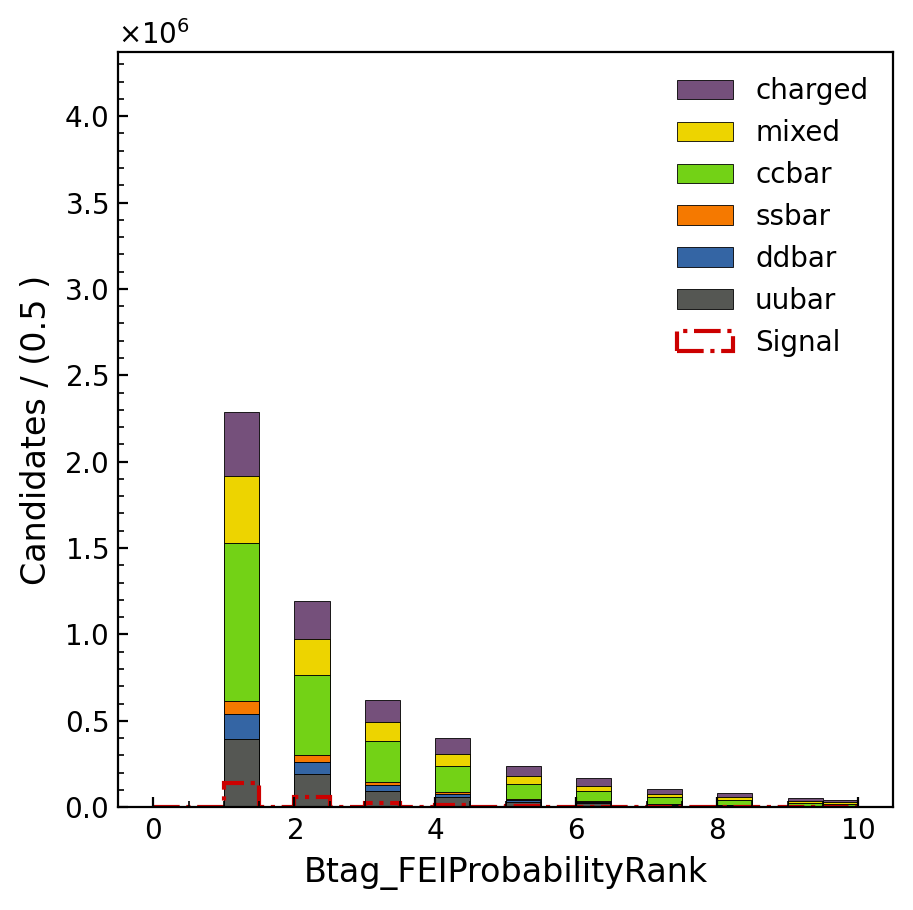

In [70]:
var1 = wg1.HistVariable("Btag_FEIProbabilityRank",
                             n_bins=20,
                             scope=(0, 10),
                             var_name="Btag_FEIProbabilityRank")


hp1 = wg1.StackedHistogramPlot(var1)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ssbar", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')
hp1.add_component("ccbar", cc, weights=cc.__weight__, color=TangoColors.chameleon,
                  comp_type='stacked')
#hp1.add_component("taupair", tau, weights=tau.__weight__, color=TangoColors.aluminium,
#                  comp_type='stacked')
hp1.add_component("mixed", mixed, weights=mixed.__weight__, color=TangoColors.butter,
                  comp_type='stacked')
hp1.add_component("charged", charged, weights=charged.__weight__, color=TangoColors.plum,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(var1)
hp2.add_component("Signal", sig, weights=sig.__weight__ *50,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)

plt.show()
export(fig, 'combo', 'examples')
plt.close()